## Statistics example problems

[1. ANOVA - geological example](#1.-ANOVA-geological-example)

[2. Non-parametric tests](#2.-Non-parametric-tests)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import pingouin as pg

### 1. ANOVA geological example

#### a. Implementation

Data come from Table 10.1 of McKillup and Dyar, Geostatistics Explained, Cambridge University Press, 2010 (excerpt available on class Google Drive). Values represent the weight percent of MgO present in tourmalines from three locations in Maine. 

Use two different methods to test whether there is a significant difference in the mean MgO content between the three different sites.

##### Method 1: Scipy

In [2]:
df = pd.read_csv('data/MgO_example/MgO_Maine.csv') # dataframe

In [3]:
df

,Mount Mica,Sebago Batholith,Black Mountain
0,7,4,1
1,8,5,2
2,10,7,4
3,11,8,5


In [4]:
stats.f_oneway(df['Mount Mica'],df['Sebago Batholith'],df['Black Mountain'])

F_onewayResult(statistic=10.799999999999999, pvalue=0.004058306777237465)

##### Method 2: Pingouin

In [5]:
df2 = pd.read_csv('data/MgO_example/MgO_Maine_list.csv')

In [6]:
df2

,MgO,Location
0,7,Mount Mica
1,8,Mount Mica
2,10,Mount Mica
3,11,Mount Mica
4,4,Sebago Batholith
5,5,Sebago Batholith
6,7,Sebago Batholith
7,8,Sebago Batholith
8,1,Black Mountain
9,2,Black Mountain


In [7]:
pg.anova(data=df2,dv='MgO',between='Location')

,Source,ddof1,ddof2,F,p-unc,np2
0,Location,2,9,10.8,0.004058,0.705882


##### Post-hoc test

In [8]:
pg.pairwise_tukey(data=df2,dv='MgO',between='Location')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Black Mountain,Mount Mica,3.0,9.0,-6.0,1.290994,-4.64758,0.003100,-2.857683
1,Black Mountain,Sebago Batholith,3.0,6.0,-3.0,1.290994,-2.32379,0.103232,-1.428841
2,Mount Mica,Sebago Batholith,9.0,6.0,3.0,1.290994,2.32379,0.103232,1.428841


#### b. ANOVA interpretation

Write a summary of your interpretation of the statistical results conducted above. Address the following questions.

* What is the null hypothesis being tested?
* Should the null hypothesis be accepted or rejected?
* What does the post-hoc test tell you?

### 2. Non-parametric tests

#### a. Wilcoxon signed-rank test: implementation

This example uses data from:
http://www.biostathandbook.com/wilcoxonsignedrank.html

The data are observations of aluminum content in 13 different poplar clones in a polluted area. The scientific question is whether there is a significant change in the aluminum content between August and November.

In [9]:
df_al = pd.read_csv('data/wilcoxon_example/Al_content.csv',
                   delimiter='\t')

In [10]:
df_al

,Clone,August,November
0,Columbia River,18.3,12.7
1,Fritzi Pauley,13.3,11.1
2,Hazendans,16.5,15.3
3,Primo,12.6,12.7
4,Raspalje,9.5,10.5
5,Hoogvorst,13.6,15.6
6,Balsam Spire,8.1,11.2
7,Gibecq,8.9,14.2
8,Beaupre,10.0,16.3
9,Unal,8.3,15.5


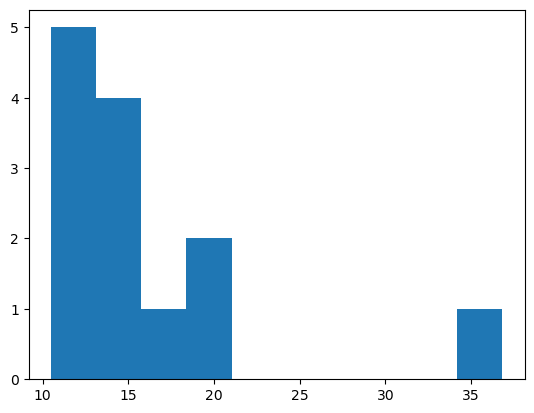

In [11]:
plt.figure()
plt.hist(df_al['November']);

In [12]:
stats.skewtest(df_al['November'])

SkewtestResult(statistic=3.449022139607473, pvalue=0.0005626205706886182)

In [13]:
stats.normaltest(df_al['November'])

/Users/tconnolly/opt/miniconda3/envs/data-book/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=21.55304457655946, pvalue=2.0884103462437462e-05)

In [14]:
stats.wilcoxon(df_al['August'],df_al['November'])

WilcoxonResult(statistic=16.0, pvalue=0.039794921875)

#### b. Interpretation

Under what situations are non-parametric statistics useful? What are the potential drawbacks in using non-parametric statistics when a parametric approach is justified?